In [1]:
from gym.wrappers import TimeLimit, FlattenObservation

from environments.simulation import ARESEAJOSS
from environments.wrappers import NormalizeAction, NormalizeObservation, ScaleReward, ScaleActuators

initializing ocelot...


In [2]:
env = ARESEAJOSS()
print("")
print({k: v.high for k, v in env.observation_space.spaces.items()})
env = TimeLimit(env, max_episode_steps=50)
env = NormalizeAction(env)
env = NormalizeObservation(env)
env = ScaleReward(env, env.unwrapped.observation_space["achieved_goal"].high.sum() * 1e-3)
env = FlattenObservation(env)
print("")
print(env.observation_space.high)
env


{'achieved_goal': array([0.004 , 0.004 , 0.0004, 0.0004], dtype=float32), 'desired_goal': array([0.003 , 0.0015, 0.001 , 0.001 ], dtype=float32), 'observation': array([1.e+05, 3.e+01, 3.e+01, 3.e+01, 3.e-03, 3.e-03], dtype=float32)}

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<FlattenObservation<ScaleReward<NormalizeObservation<NormalizeAction<TimeLimit<ARESEAJOSS instance>>>>>>

In [3]:
env.observation_space

Box(-1.0, 1.0, (14,), float32)

In [4]:
env.reset()

array([-0.08397701,  0.11008491,  1.966578  ,  0.65807015,  0.9373767 ,
       -0.73300195,  0.74143475,  0.76973724,  1.        ,  0.6540258 ,
        0.90218955, -0.66149956, -0.34193787,  0.881693  ], dtype=float32)

In [5]:
env.goal

array([-0.00016699, -0.00033268,  0.00087261,  0.00011365], dtype=float32)

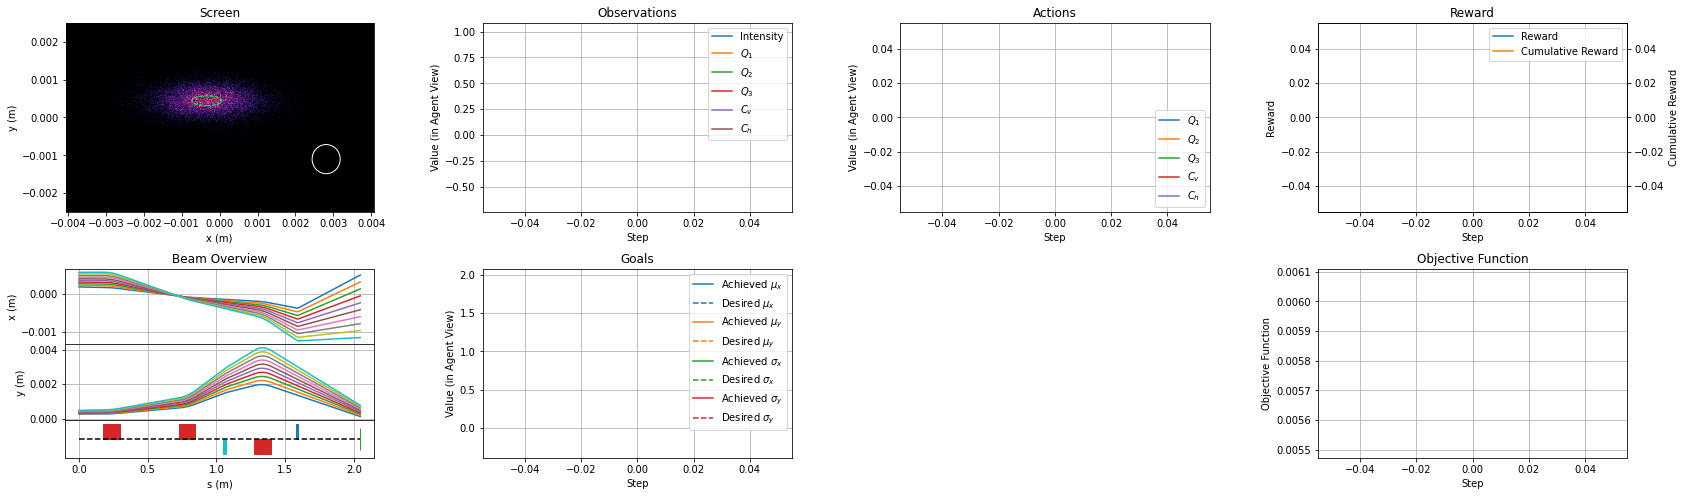

In [5]:
env.render()

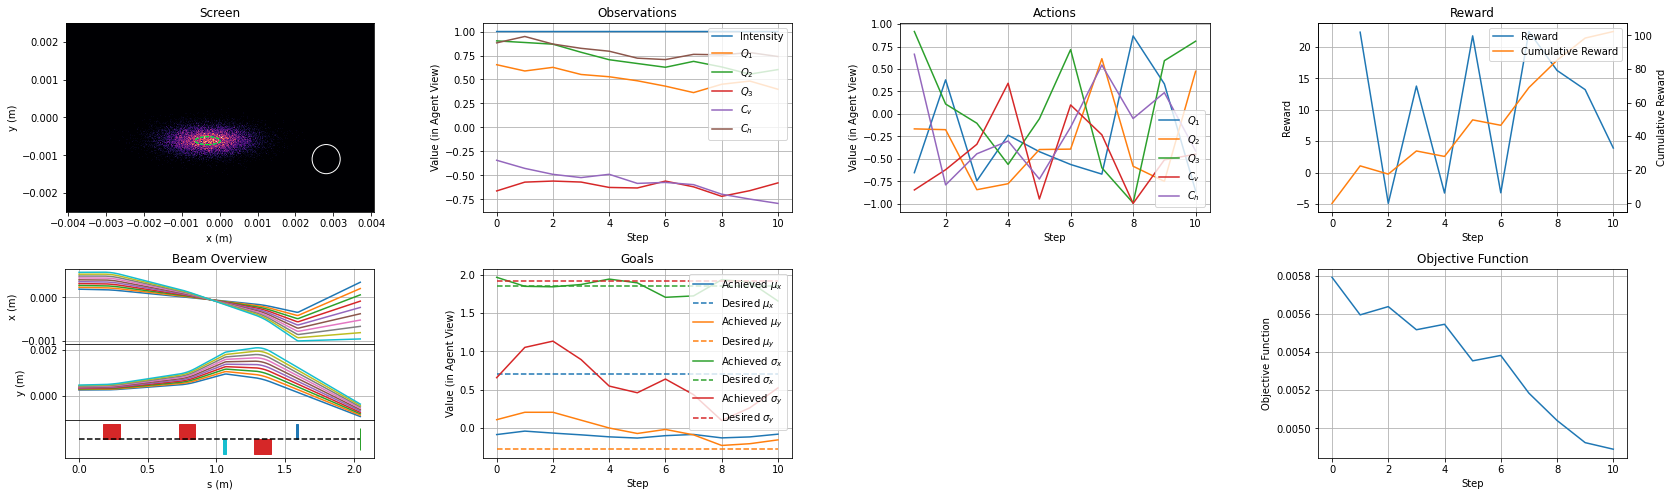

In [6]:
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # print(f"{observation[:4]}\t{reward:.5f}\t{done}")

env.render()

In [7]:
env.reset()
env.beam_parameters

array([0.00023848, 0.00262966, 0.00040442, 0.00612803])

In [10]:
from scipy import optimize

env = ARESEAJOSS()
env = ScaleActuators(env, env.optimization_space.high)
env.reset()

env.render()
bounds = optimize.Bounds(env.optimization_space.low, env.optimization_space.high)
x = optimize.minimize(fun=env.evaluate,
                      x0=env.initial_actuators,
                      bounds=bounds)
print(x)
env.render()

TypeError: 'NoneType' object is not subscriptable

In [10]:
env.beam_parameters

array([-9.75054913e-05, -1.45174802e-09, -7.71380050e-04, -5.73778248e-04])

In [11]:
env.actuators

array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72043362e-03])

In [12]:
bounds

Bounds(array([-1., -1., -1., -1., -1.], dtype=float32), array([1., 1., 1., 1., 1.], dtype=float32))

In [13]:
env.observation_space.high

array([4.e-03, 4.e-03, 4.e-04, 4.e-04, 1.e+05, 3.e+01, 3.e+01, 3.e+01,
       3.e-03, 3.e-03], dtype=float32)